<!-- Project Summary Card -->
<style>
.summary-card {
  max-width: 940px;
  margin: 24px auto;
  background: linear-gradient(180deg, #002147 0%, #000814 100%);
  color: #f1f1f1;
  border-radius: 18px;
  padding: 28px 34px;
  box-shadow: 0 8px 26px rgba(0,0,0,0.55);
  font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial;
  line-height: 1.8;
  border: 1px solid rgba(255,255,255,0.08);
}
.summary-card h2 {
  font-size: 26px;
  margin: 0 0 14px 0;
  font-weight: 700;
  color: #00b4d8;
  display: flex;
  align-items: center;
  gap: 10px;
}
.summary-card h3 {
  font-size: 20px;
  margin-top: 20px;
  margin-bottom: 12px;
  font-weight: 600;
  color: #ffd60a;
}
.summary-card ul {
  margin: 0;
  padding-left: 22px;
}
.summary-card li {
  margin-bottom: 10px;
  font-size: 15px;
}
</style>

<div class="summary-card">
  <h2>📌Project Summary: Loan Defualt Prediction System Using Machine Learning </h2>
  
  <h3>🎯Goal</h3>
  <ul>
    <li> This Model aims to predict the likelihood of a borrower defaulting on a loan payment .</li>
      </ul>
</div>


In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # rf model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression #lo model
from sklearn.tree import DecisionTreeClassifier # dt model
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Loading  Data Set

In [2]:
#read data file 
df =pd.read_csv('C:/Users/david/OneDrive/Desktop/loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [7]:
df.columns = df.columns.str.strip()


###  Creating data for age

In [8]:
import numpy as np

np.random.seed(42)

# Generate synthetic ages (normal distribution)
ages = np.random.normal(loc=35, scale=10, size=len(df)).astype(int)

# Clip values to 21–65 range
ages = np.clip(ages, 21, 65)

# Add to dataframe
df["age"] = ages

# Quick check
print(df["age"].describe())
print(df[["age", "income_annum", "loan_amount"]].head())


count    4269.000000
mean       35.005856
std         9.226389
min        21.000000
25%        28.000000
50%        35.000000
75%        41.000000
max        65.000000
Name: age, dtype: float64
   age  income_annum  loan_amount
0   39       9600000     29900000
1   33       4100000     12200000
2   41       9100000     29700000
3   50       8200000     30700000
4   32       9800000     24200000


### Droping unrequired columns

In [9]:
data = df.drop(columns=['loan_id',  'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',]) #'loan_status'

In [10]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,age
0,2,Graduate,No,9600000,29900000,12,778,Approved,39
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,33
2,3,Graduate,No,9100000,29700000,20,506,Rejected,41
3,3,Graduate,No,8200000,30700000,8,467,Rejected,50
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,32


In [11]:
#check missing value & duplicated 
print(f'Missing value = {data.isnull().sum()}') # => missing value

Missing value = no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
age                 0
dtype: int64


In [12]:
#show shape 
data.shape


(4269, 9)

### Mapping target values to high and low risk

In [13]:
# Clean up loan_status values
data['loan_status'] = data['loan_status'].str.strip().str.title()

# Map Approved/Rejected to risk labels
data['risk_class'] = data['loan_status'].map({
    'Approved': 'Low Risk',
    'Rejected': 'High Risk'
})

print(data['loan_status'].unique())   # check what unique values exist
print(data['risk_class'].value_counts(dropna=False))


['Approved' 'Rejected']
risk_class
Low Risk     2656
High Risk    1613
Name: count, dtype: int64


In [14]:
#columns name
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'loan_status', 'age',
       'risk_class'],
      dtype='object')

In [15]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,age,risk_class
0,2,Graduate,No,9600000,29900000,12,778,Approved,39,Low Risk
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,33,High Risk
2,3,Graduate,No,9100000,29700000,20,506,Rejected,41,High Risk
3,3,Graduate,No,8200000,30700000,8,467,Rejected,50,High Risk
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,32,High Risk


## Data Handling & EDA


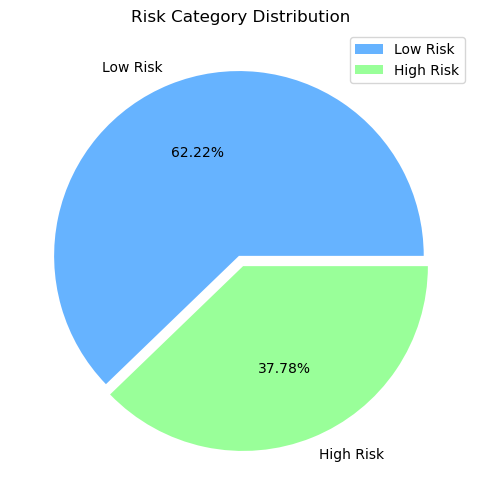

In [16]:
counts = data['risk_class'].value_counts()
labels = counts.index
sizes = counts.values

# Create explode dynamically (no offset for all slices)
# Define custom colors (you can pick any)
consistent_colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#c2c2f0']

explode = [0.03] * len(sizes)  

plt.figure(figsize=(10,6))
plt.pie(sizes,
        labels=labels,
        colors=consistent_colors[:len(sizes)],
        explode=explode,
        autopct="%1.2f%%")
plt.title('Risk Category Distribution')
plt.legend()
plt.show()


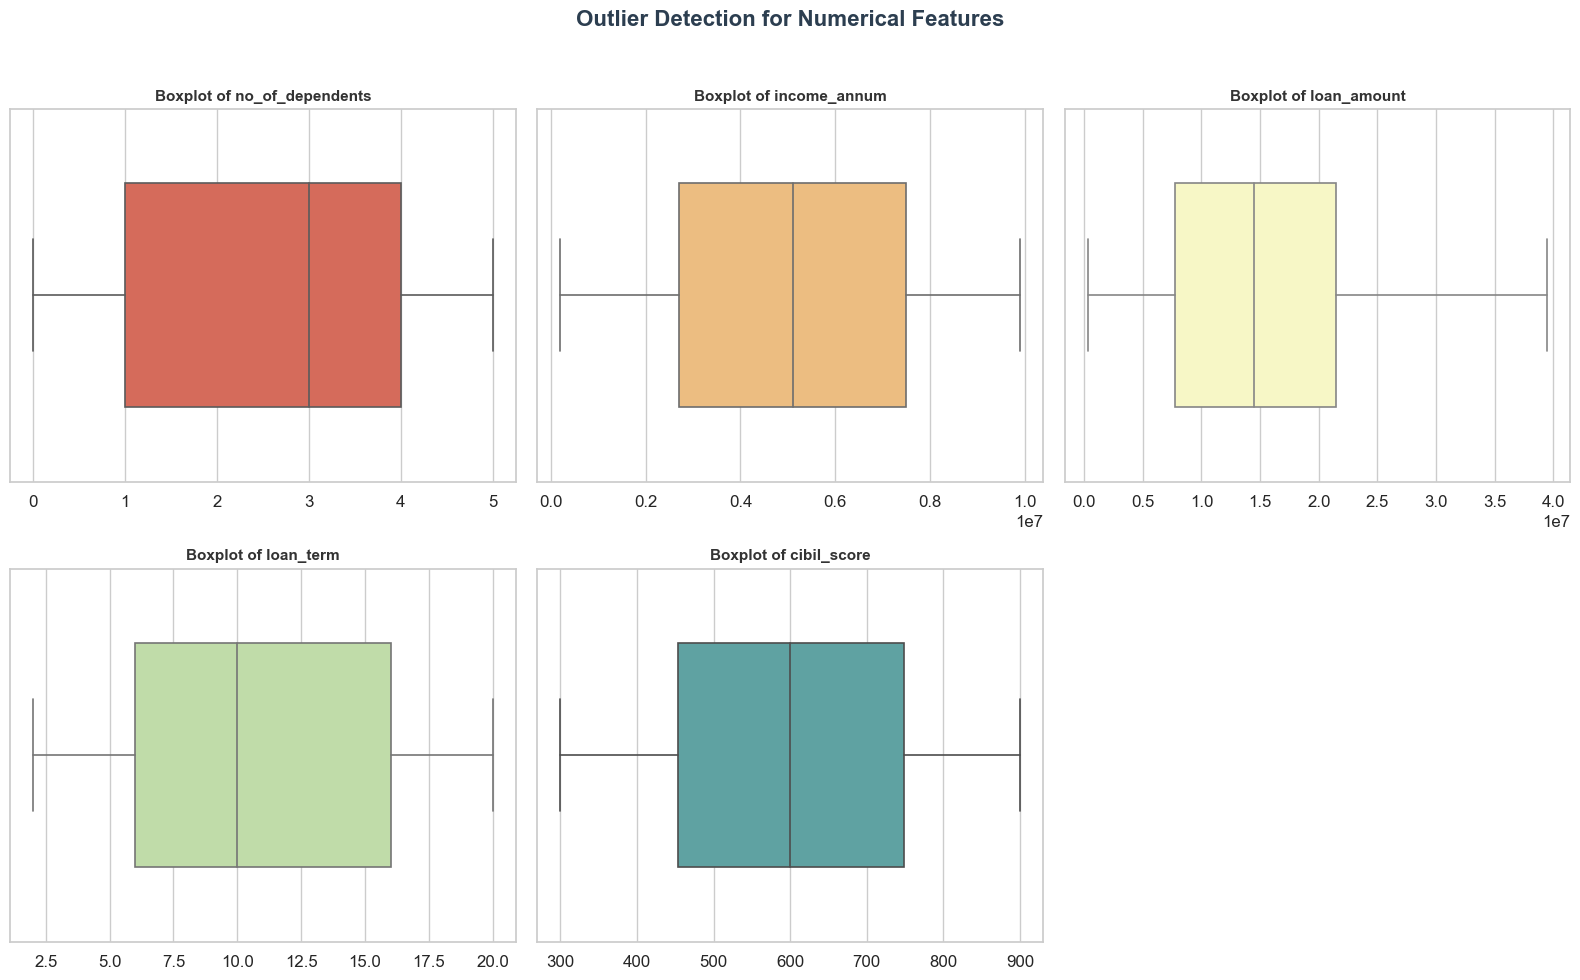

In [18]:
# Select numerical columns
numerical = data.select_dtypes(include=['int64', 'float64']).columns

# Set seaborn theme
sns.set(style="whitegrid", palette="Spectral", font_scale=1.1)

# Define color palette (vivid & unique)
palette = sns.color_palette("Spectral", len(numerical))

# Plot
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x=df[col],
        color=palette[i-1],
        width=0.6,
        fliersize=2,  
        linewidth=1.2
    )
    plt.title(f"Boxplot of {col}", fontsize=11, fontweight="bold", color="#333333")
    plt.xlabel("")  
plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # space for suptitle
plt.show()


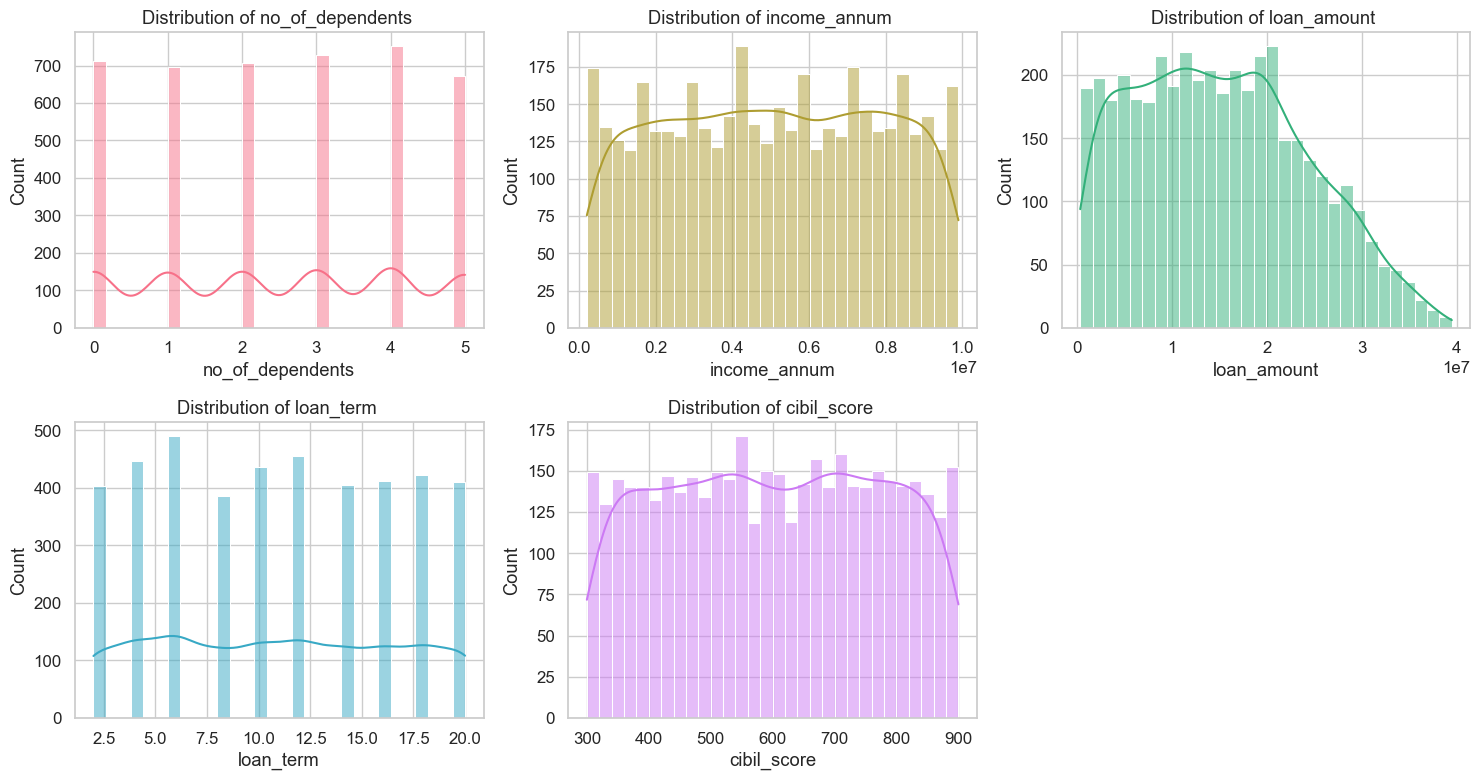

In [20]:
#show Distribution for all numerical columns 
palette =sns.color_palette("husl",len(numerical))

plt.figure(figsize=(15,8))

#for loop 
for i,col in enumerate(numerical,1):
    plt.subplot(2,3,i)
    sns.histplot(data[col],kde=True ,color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()


## Relation between Target column with Categorical columns

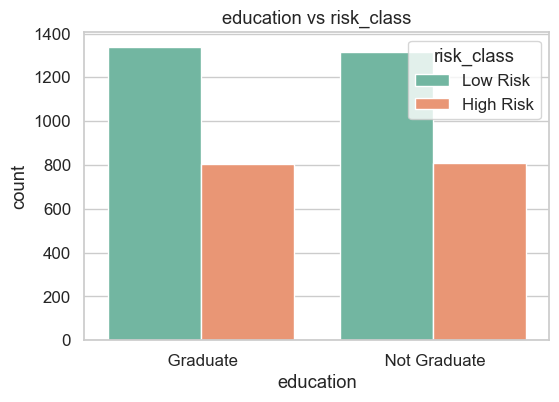

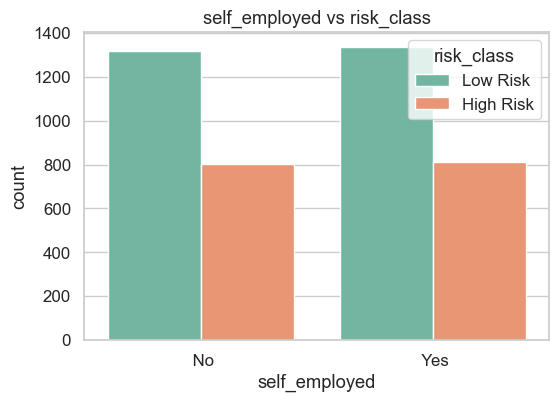

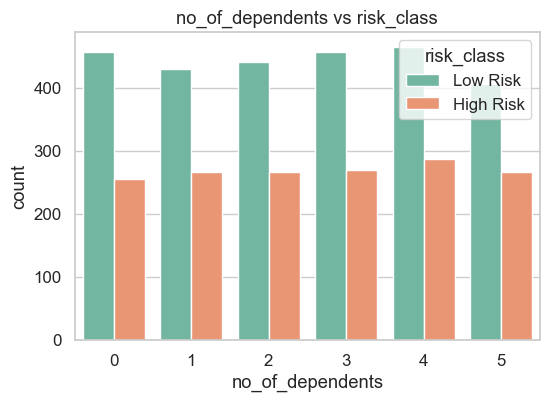

In [21]:
target = "risk_class"

# Categorical
categorical = ["education", "self_employed", "no_of_dependents"]
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=data, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()

## Relation between Target column with Numerical columns

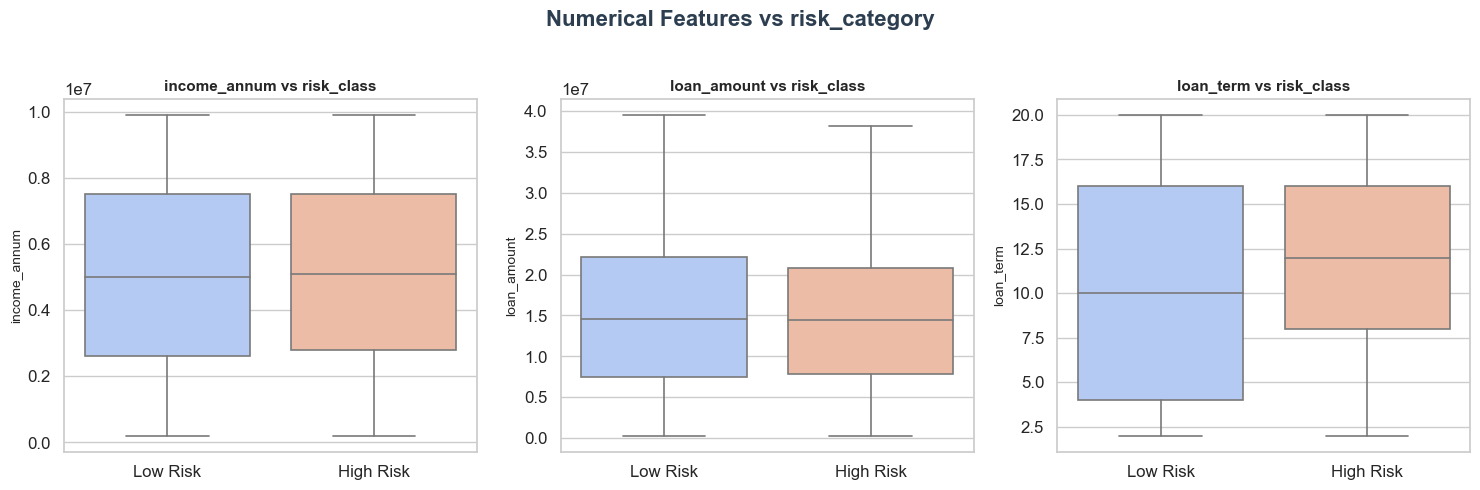

In [22]:
numerical = [
    "income_annum", "loan_amount", "loan_term"
]

# Create subplots based on number of features
n_cols = 3
n_rows = (len(numerical) + n_cols - 1) // n_cols  # dynamic row count

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5))
axes = axes.flatten()  

for i, col in enumerate(numerical):
    sns.boxplot(
        data=data, 
        x=target, 
        y=col, 
        ax=axes[i], 
        palette="coolwarm",
        fliersize=2, 
        linewidth=1.2
    )
    axes[i].set_title(f"{col} vs {target}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")  
    axes[i].set_ylabel(col, fontsize=10)

# Hide any extra empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Numerical Features vs risk_category", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


## Encoding Categorical columns

In [23]:
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])
data['self_employed'] = le.fit_transform(data['self_employed'])
data['risk_class'] = le.fit_transform(data['risk_class'])

In [24]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,age,risk_class
0,2,0,0,9600000,29900000,12,778,Approved,39,1
1,0,1,1,4100000,12200000,8,417,Rejected,33,0
2,3,0,0,9100000,29700000,20,506,Rejected,41,0
3,3,0,0,8200000,30700000,8,467,Rejected,50,0
4,5,1,1,9800000,24200000,20,382,Rejected,32,0


## split data to Train & Test

In [29]:
X = data.drop(columns=['loan_status', 'risk_class'], axis =1)
y = data['risk_class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 8)
Test shape: (854, 8)


## Catboost model

In [27]:
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

# Combine X_train and y_train for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Rename y_train column properly if needed
train_df = train_df.rename(columns={y_train.name: "risk_colum"})

# Separate majority and minority classes
low_risk = train_df[train_df['risk_colum'] == 0]   # Low Risk
high_risk = train_df[train_df['risk_colum'] == 1]  # High Risk

# Oversample minority class
low_risk_upsampled = resample(low_risk, 
                              replace=True,     
                              n_samples=len(high_risk), 
                              random_state=42)

# Combine balanced dataset
train_balanced = pd.concat([high_risk, low_risk_upsampled])

# Shuffle dataset
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into X and y
X_train_bal = train_balanced.drop('risk_colum', axis=1)
y_train_bal = train_balanced['risk_colum']

print("Balanced training distribution:\n", y_train_bal.value_counts())

# Train CatBoost with CV
cat_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.01,
    loss_function='Logloss',
    class_weights=[1,2],  # weight Low Risk higher
    verbose=0
)



scores = cross_val_score(cat_model, X_train_bal, y_train_bal, cv=6, scoring='accuracy')
print("Cross-validation Accuracy:", scores.mean())

# Fit on balanced data
cat_model.fit(X_train_bal, y_train_bal)

# Test set predictions
y_pred = cat_model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Balanced training distribution:
 risk_colum
1    2125
0    2125
Name: count, dtype: int64
Cross-validation Accuracy: 0.9882383877985227
Confusion Matrix:
 [[308  15]
 [  4 527]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       323
           1       0.97      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



## Confusion Matrix

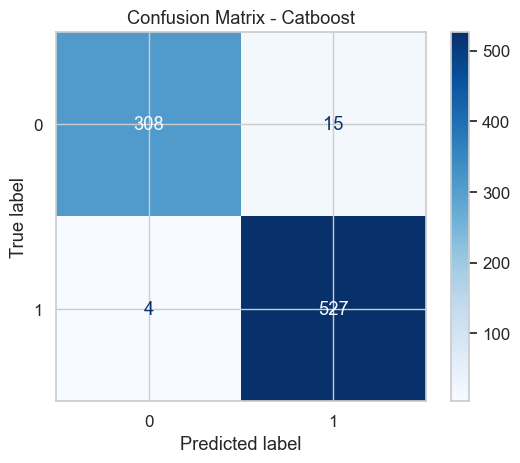

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Catboost")
plt.show()

## Model Feature importance 

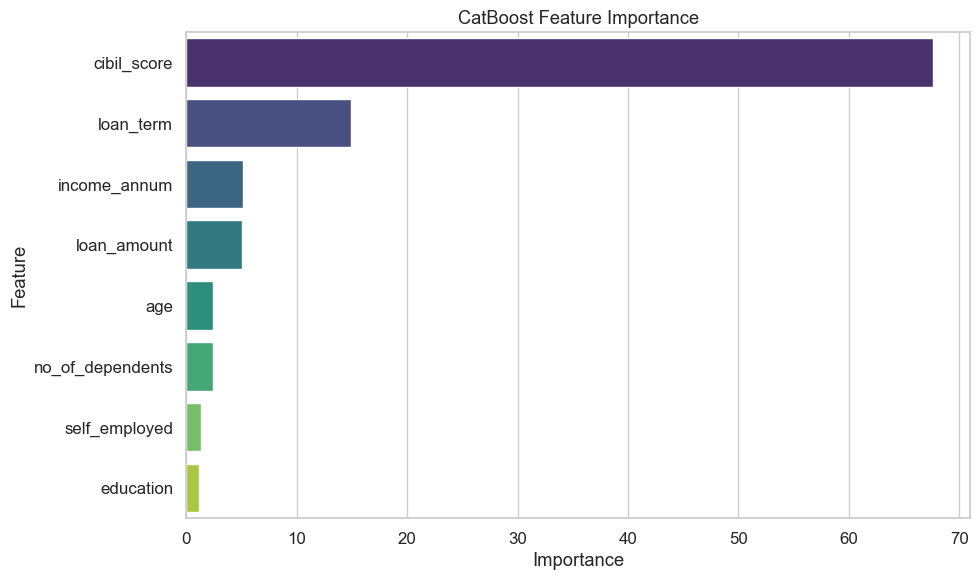

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = cat_model.get_feature_importance()
feature_names = X_train.columns

# Put into DataFrame for sorting
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


## Saving the model

In [31]:
from catboost import CatBoostClassifier

# Save model
cat_model.save_model("catboost_model.cbm")

# Later, load model
loaded_model = CatBoostClassifier()
loaded_model.load_model("catboost_model.cbm")
